In [67]:
import math
import matplotlib.pyplot as plt
import random

In [68]:
def find_vector_of_stimulus(waveform, time_of_spike, num_dimensions, sampling_rate):
    output_vector = []

    prev_time = time_of_spike - (num_dimensions * sampling_rate)
    while prev_time < num_dimensions:
        output_vector.append(waveform[prev_time])
        prev_time += sampling_rate
    
    return output_vector

In [69]:
def find_stimulus_triggered_average(stimulus_vectors):
    average_vector = []

    num_stimuli = stimulus_vectors.size()
    stimulus_duration = stimulus_vectors[0].size()

    for time in range(stimulus_duration):
        sum = 0
        for stimulus in range(num_stimuli):
            sum += stimulus_vectors[stimulus][time]
        average_vector.append(sum / num_stimuli)
    
    return average_vector


In [95]:
def plot_hist(data, bins=100):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title("Histogram")
    plt.show()


In [96]:
def generate_gaussian_white_noise(mean, variance, required_num_samples):

    std_deviation = math.sqrt(variance)

    def pdf(x):
        coeff = 1 / (std_deviation * math.sqrt(2 * math.pi))
        euler_exponent = -0.5 * (((x - mean) / std_deviation) ** 2)
        return coeff * math.exp(euler_exponent)

    lower_limit = mean - (4 * std_deviation)
    M = pdf(mean)

    samples = []

    while len(samples) < required_num_samples:
        x = lower_limit + (8 * std_deviation * random.random())
        u = random.random()
        if u < pdf(x)/M:
            samples.append(x)

    return samples



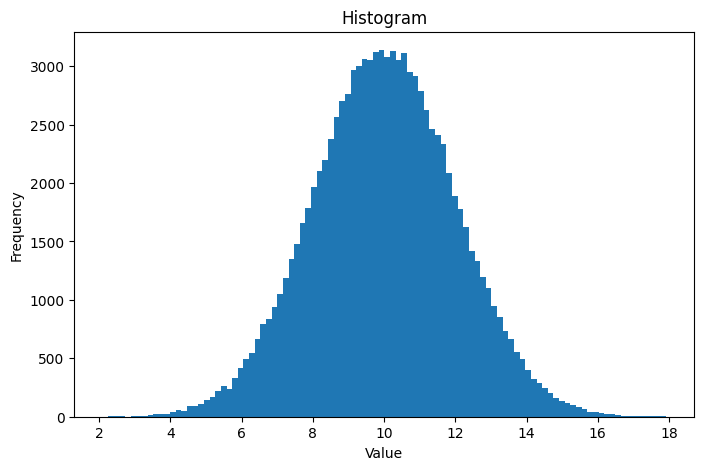

[10.362723009957833, 11.790198278597249, 9.933391013455916, 10.6196884886386, 10.59305671583821, 13.15083079899644, 10.518106771210455, 11.304158684092712, 8.679057699444853, 7.415699257919622, 11.075732501600823, 12.380080521431086, 8.424984364746415, 6.628422980175822, 8.58367396840251, 10.591958674578018, 10.971244196467813, 8.391075067032586, 12.904368019968045, 7.352616901381419, 10.795281118323729, 10.867765881588893, 7.278083116437292, 11.586344644987486, 8.316951304583348, 9.403309855493937, 10.3398592298866, 5.331425057344301, 4.440394523284727, 10.399269128411532, 10.472992369557115, 9.48960794918535, 13.251291793347672, 8.116604848005576, 10.5161480477601, 10.290287538666318, 9.270666261764164, 12.95109003079181, 9.391958090151919, 7.8252208030891275, 12.691514120412444, 9.568506825192298, 8.522315089380754, 8.09767370540904, 7.358236191038873, 9.447015867300848, 6.530075504536255, 8.784059596804441, 10.43249609602043, 7.414304356763012, 9.641772099826742, 9.167229803822446,

In [98]:
output = generate_gaussian_white_noise(10, 4, 100000)
plot_hist(output)
print(output)